[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/tushar-mahalya/Custom-ChatGPT/blob/master/EDA.ipynb)

In [2]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

In [4]:
import os
os.getcwd()

'/home/studio-lab-user/sagemaker-studiolab-notebooks/Custom ChatGPT/notebooks'

In [5]:
# Loading Datasets
posts_df = pd.read_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/Custom ChatGPT/data/Top_Posts.csv')
comments_df = pd.read_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/Custom ChatGPT/data/Top_Posts_Comments.csv')

In [6]:
# Joning Comments with their respective Post ID
comments_posts_merged = posts_df.merge(comments_df, on = 'post_id', how = 'left')

# Deleting rows that doesn't contain any Comment
comments_posts_merged = comments_posts_merged[~comments_posts_merged['comment'].isnull()]

In [7]:
comments_posts_merged.sample(5)

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
86271,razsj2,[D] Why do people “read” as many papers as pos...,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,Discussion,546,105,0.91,2021-12-07 13:59:45,2021,"Yeah, it’s tough to bash through full paper af..."
52751,9f18t6,perfect answer 😎,datascience,https://i.redd.it/2yc30ije9ol11.jpg,NaN,745,178,0.92,2018-09-11 20:49:01,2018,Downvote me daddy.
7985,g7wvpb,[R] Adversarial Latent Autoencoders (CVPR2020 ...,MachineLearning,https://v.redd.it/0bzww3okvzu41,Research,2316,99,0.99,2020-04-25 16:57:49,2020,"Read the paper, section 4.1. Reference 35 is t..."
214399,9ia8hh,Linkedin always offers a “simpler” solution,artificial,https://i.redd.it/4b5zuhumy0o11.jpg,NaN,132,3,0.94,2018-09-23 17:40:04,2018,Yes it is a real thing. Besides on the Amazon ...
47349,xix8ef,[P] I turned Stable Diffusion into a lossy ima...,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,Project,794,102,0.99,2022-09-20 03:03:03,2022,So third grade curriculum for my grandkids


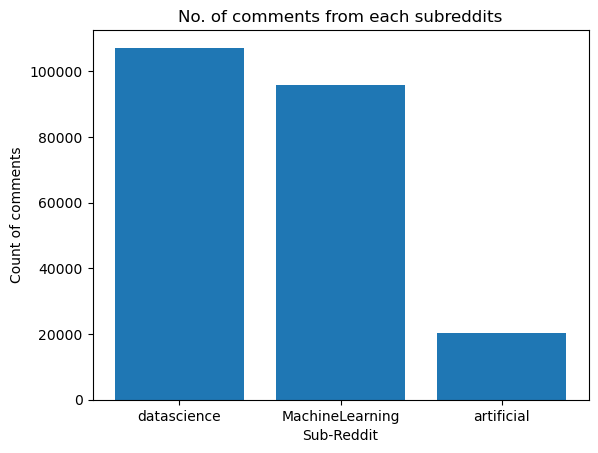

In [8]:
comment_count = dict(comments_posts_merged['subreddit'].value_counts())
plt.bar(comment_count.keys(), comment_count.values())
plt.title('No. of comments from each subreddits')
plt.xlabel('Sub-Reddit')
plt.ylabel('Count of comments')
plt.show()

In [15]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_text_data(df, text_column):
    # Remove irrelevant characters and extra whitespaces
    df[text_column] = df[text_column].str.replace(r"[^\w\s]", "")
    df[text_column] = df[text_column].str.replace(r"\s+", " ")

    # Convert text to lowercase
    df[text_column] = df[text_column].str.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df[text_column] = df[text_column].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stop_words]))

    # Stemming
    stemmer = PorterStemmer()
    df[text_column] = df[text_column].apply(lambda text: ' '.join([stemmer.stem(word) for word in word_tokenize(text)]))
    
    
    # Handle misspellings (if applicable)
    # You can add your custom logic here to handle misspellings

    # Handle missing data (if applicable)
    # You can add your custom logic here to handle missing data

    return df


In [ ]:
new_comments_df = clean_text_data(comments_posts_merged, 'comment')

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

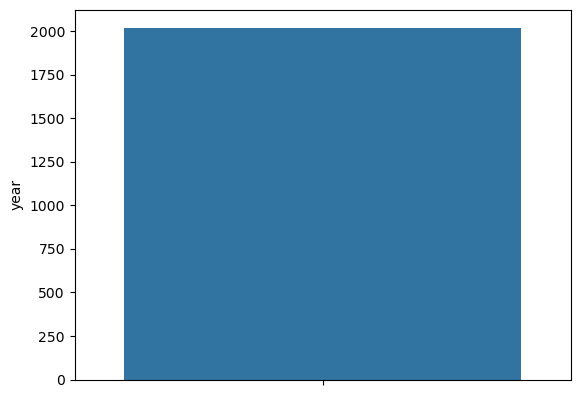

In [13]:
# Create a bar plot
sns.barplot(y="year", hue="subreddit", data=posts_df)
plt.show()

In [6]:
comments_posts_merged['subreddit'].value_counts()

datascience        107155
MachineLearning     95700
artificial          20304
Name: subreddit, dtype: int64

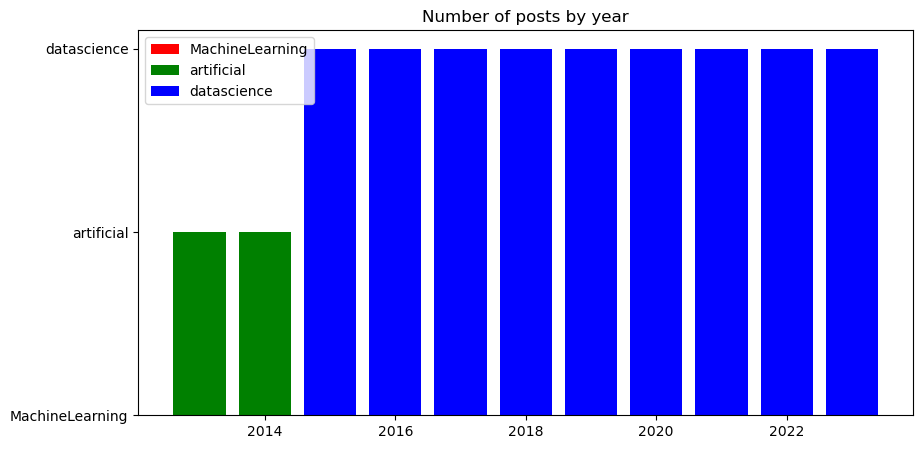

In [11]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))
colors = {'MachineLearning': 'red', 'datascience': 'blue', 'artificial': 'green'}
for i, (name, group) in enumerate(posts_df.groupby('subreddit')):
    ax.bar(group['year'], group['subreddit'], color=colors[name], label=name)

# Set title and legend
ax.set_title('Number of posts by year')
ax.legend()
plt.show()